# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv("/kaggle/input/electric-vehicle-population-data-washington-us/Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121973,5YJYGDEE2M,King,Issaquah,WA,98027.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,179180543,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
121974,1N4BZ0CP1H,Snohomish,Lynnwood,WA,98037.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,32.0,177995058,POINT (-122.27734 47.83785),PUGET SOUND ENERGY INC,5.306105e+10
121975,5YJYGDEFXL,Snohomish,Mountlake Terrace,WA,98043.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,32.0,106429655,POINT (-122.31111 47.78803),PUGET SOUND ENERGY INC,5.306105e+10
121976,1N4BZ1CPXK,King,Seattle,WA,98118.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,37.0,100595218,POINT (-122.2668 47.55115),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [3]:
df.shape

(121978, 17)

In [4]:
df.size

2073626

# Selecting Features we are going to use

In [5]:
cols_to_use = ["VIN (1-10)","City","Model Year","Make","Electric Vehicle Type","Clean Alternative Fuel Vehicle (CAFV) Eligibility","Electric Range"]
df = df[cols_to_use]
df

,VIN (1-10),City,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,5YJ3E1EB2J,Suffolk,2018,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
1,5YJ3E1ECXL,Yakima,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308
2,WA1LAAGE7M,Yakima,2021,AUDI,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222
3,5YJ3E1EA1K,Danville,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220
4,1FADP5CU9E,Norfolk,2014,FORD,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19
...,...,...,...,...,...,...,...
121973,5YJYGDEE2M,Issaquah,2021,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
121974,1N4BZ0CP1H,Lynnwood,2017,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107
121975,5YJYGDEFXL,Mountlake Terrace,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291
121976,1N4BZ1CPXK,Seattle,2019,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121978 entries, 0 to 121977
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         121978 non-null  object
 1   City                                               121976 non-null  object
 2   Model Year                                         121978 non-null  int64 
 3   Make                                               121978 non-null  object
 4   Electric Vehicle Type                              121978 non-null  object
 5   Clean Alternative Fuel Vehicle (CAFV) Eligibility  121978 non-null  object
 6   Electric Range                                     121978 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 6.5+ MB


In [7]:
df.describe()

,Model Year,Electric Range
count,121978.00000,121978.000000
mean,2019.30890,81.301407
std,2.95635,100.890849
min,1997.00000,0.000000
25%,2018.00000,0.000000
50%,2020.00000,25.000000
75%,2022.00000,200.000000
max,2023.00000,337.000000


In [8]:
df[cols_to_use].nunique()

VIN (1-10)                                           8171
City                                                  647
Model Year                                             21
Make                                                   35
Electric Vehicle Type                                   2
Clean Alternative Fuel Vehicle (CAFV) Eligibility       3
Electric Range                                        101
dtype: int64

# Looking for duplicates

In [9]:
df.duplicated().sum()

49692

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(72286, 7)

# Looking for Outliers

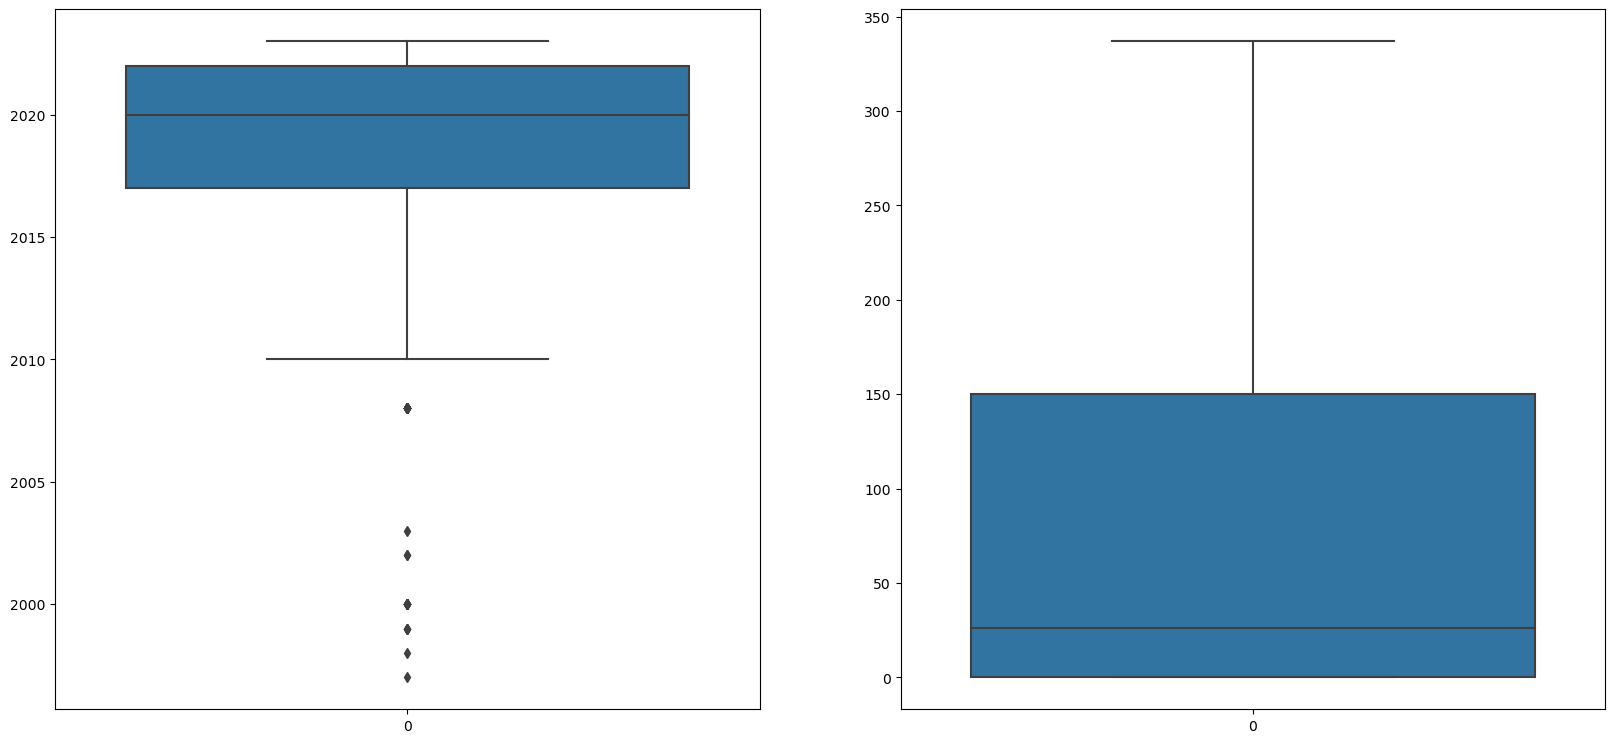

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df["Model Year"])
plt.subplot(2,2,2)
sns.boxplot(df["Electric Range"])
plt.show()

# Insights
#### As we can see the Model Year have some outliers but can't remove them because they are considered to considrable outliers

# Data Visualization

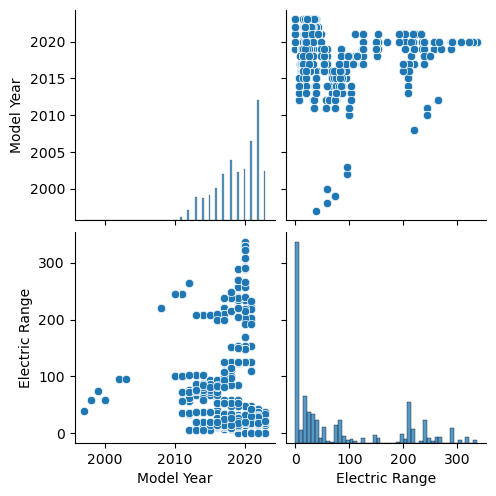

In [13]:
sns.pairplot(df)

(array([0, 1]),
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

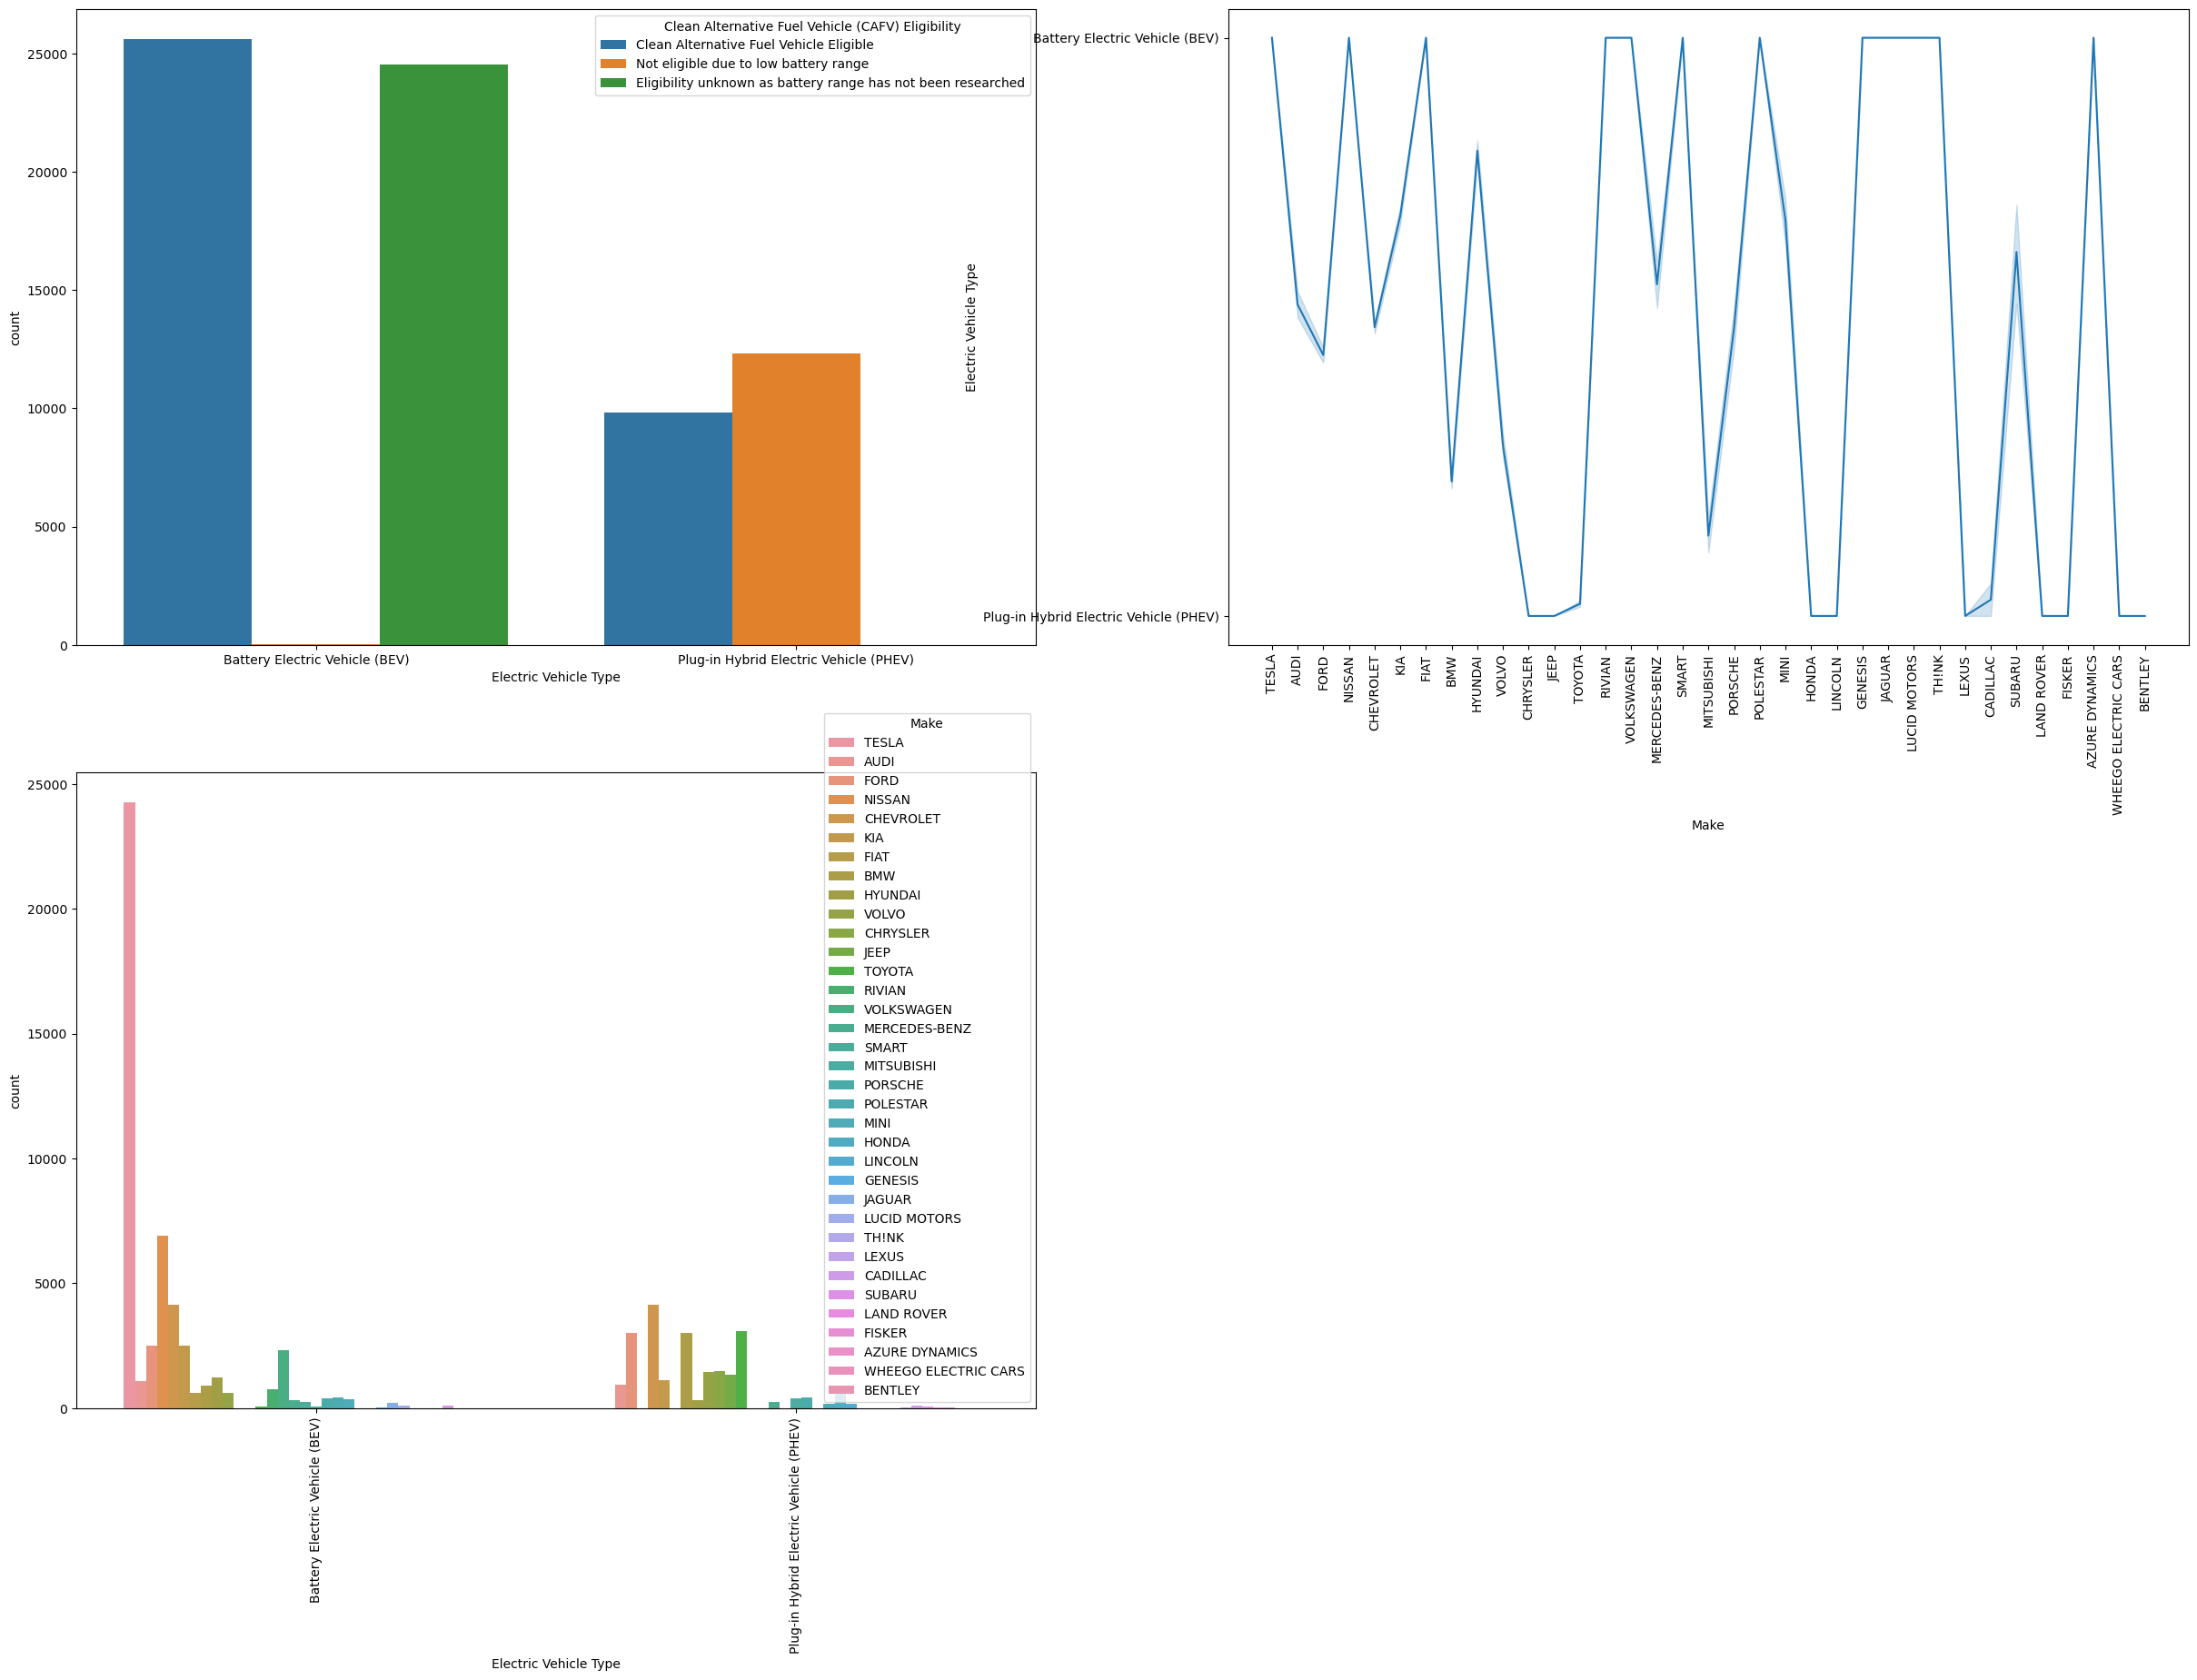

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.countplot(x="Electric Vehicle Type", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", data=df)
plt.subplot(2,2,2)
sns.lineplot(x="Make",y="Electric Vehicle Type",data=df)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.countplot(x="Electric Vehicle Type",hue="Make",data=df)
plt.xticks(rotation=90)

# Insights
1. Here we can see in Battery Electric Vehicle consists of vehicles which are Clean Alternative Fuel Vehicle Eligible and also vehicles whose eligibility is unknown as battery range has not been researched.
2. In Plug-in Hybrid Electric Vehicle consits of vehicles which are Clean Alternative Fuel Vehicle Eligible and also vehicles who are not eligible due to low battery range.
3. From the line plot we can figure out that vehicles made by most of the companies are Battery Electric Vehicles (BEV).
4. From the Third chart we can say that Tesla is the leading producer of the Electric vahicles and mostly they are (BEV) Battery Electric Vehicle.

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Not eligible due to low battery range'),
  Text(2, 0, 'Eligibility unknown as battery range has not been researched')])

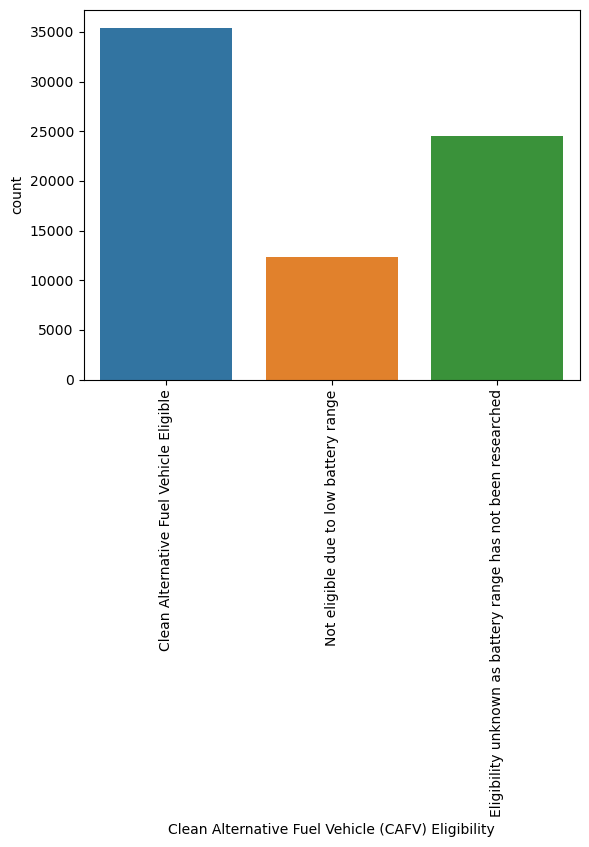

In [15]:
sns.countplot(data=df, x="Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.xticks(rotation=90)

# Insights
1. In Clean Alternative Fuel Vehicle Eligibility (CAFV) the maximum EV cars from the dataset are Clean Alternative Fuel Vehicle Eligible

(array([0, 1]),
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

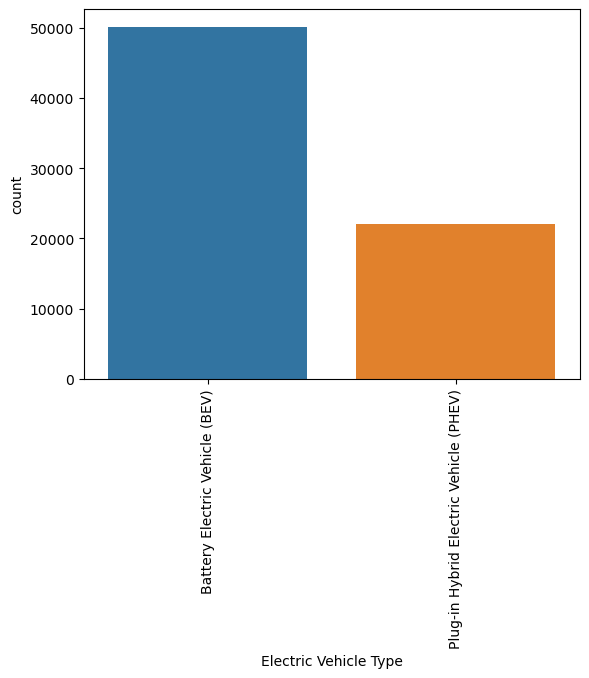

In [16]:
sns.countplot(data=df, x="Electric Vehicle Type")
plt.xticks(rotation=90)

# Insights
1. In Electric Vehicle Type more than 80k vehicles are BEV i.e Battery Electric Vehicle and around 25k vehicles are PHEV i.e Plug-in Hybrid Electric Vehicle

# Encoding
1. As there are multiple categorical columns, then we use label and one hot encoding

In [17]:
le=LabelEncoder()
df["Electric Vehicle Type"]=le.fit_transform(df["Electric Vehicle Type"])
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=le.fit_transform(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])

In [18]:
ohe=pd.get_dummies(df,columns=["Make"])
ohe

,VIN (1-10),City,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,...,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS
0,5YJ3E1EB2J,Suffolk,2018,0,0,215,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5YJ3E1ECXL,Yakima,2020,0,0,308,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,WA1LAAGE7M,Yakima,2021,0,0,222,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5YJ3E1EA1K,Danville,2019,0,0,220,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1FADP5CU9E,Norfolk,2014,1,2,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121964,5YJ3E1EC8P,Auburn,2023,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121969,1FADP5CU9G,Auburn,2016,1,2,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121972,WA1E2AFYXL,Everett,2020,1,2,20,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121975,5YJYGDEFXL,Mountlake Terrace,2020,0,0,291,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
df=ohe

In [20]:
df.drop(["VIN (1-10)","City"],axis=1,inplace=True)
df

,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS
0,2018,0,0,215,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2020,0,0,308,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2021,0,0,222,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,0,0,220,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,1,2,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121964,2023,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121969,2016,1,2,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121972,2020,1,2,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121975,2020,0,0,291,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Correlation

<AxesSubplot:>

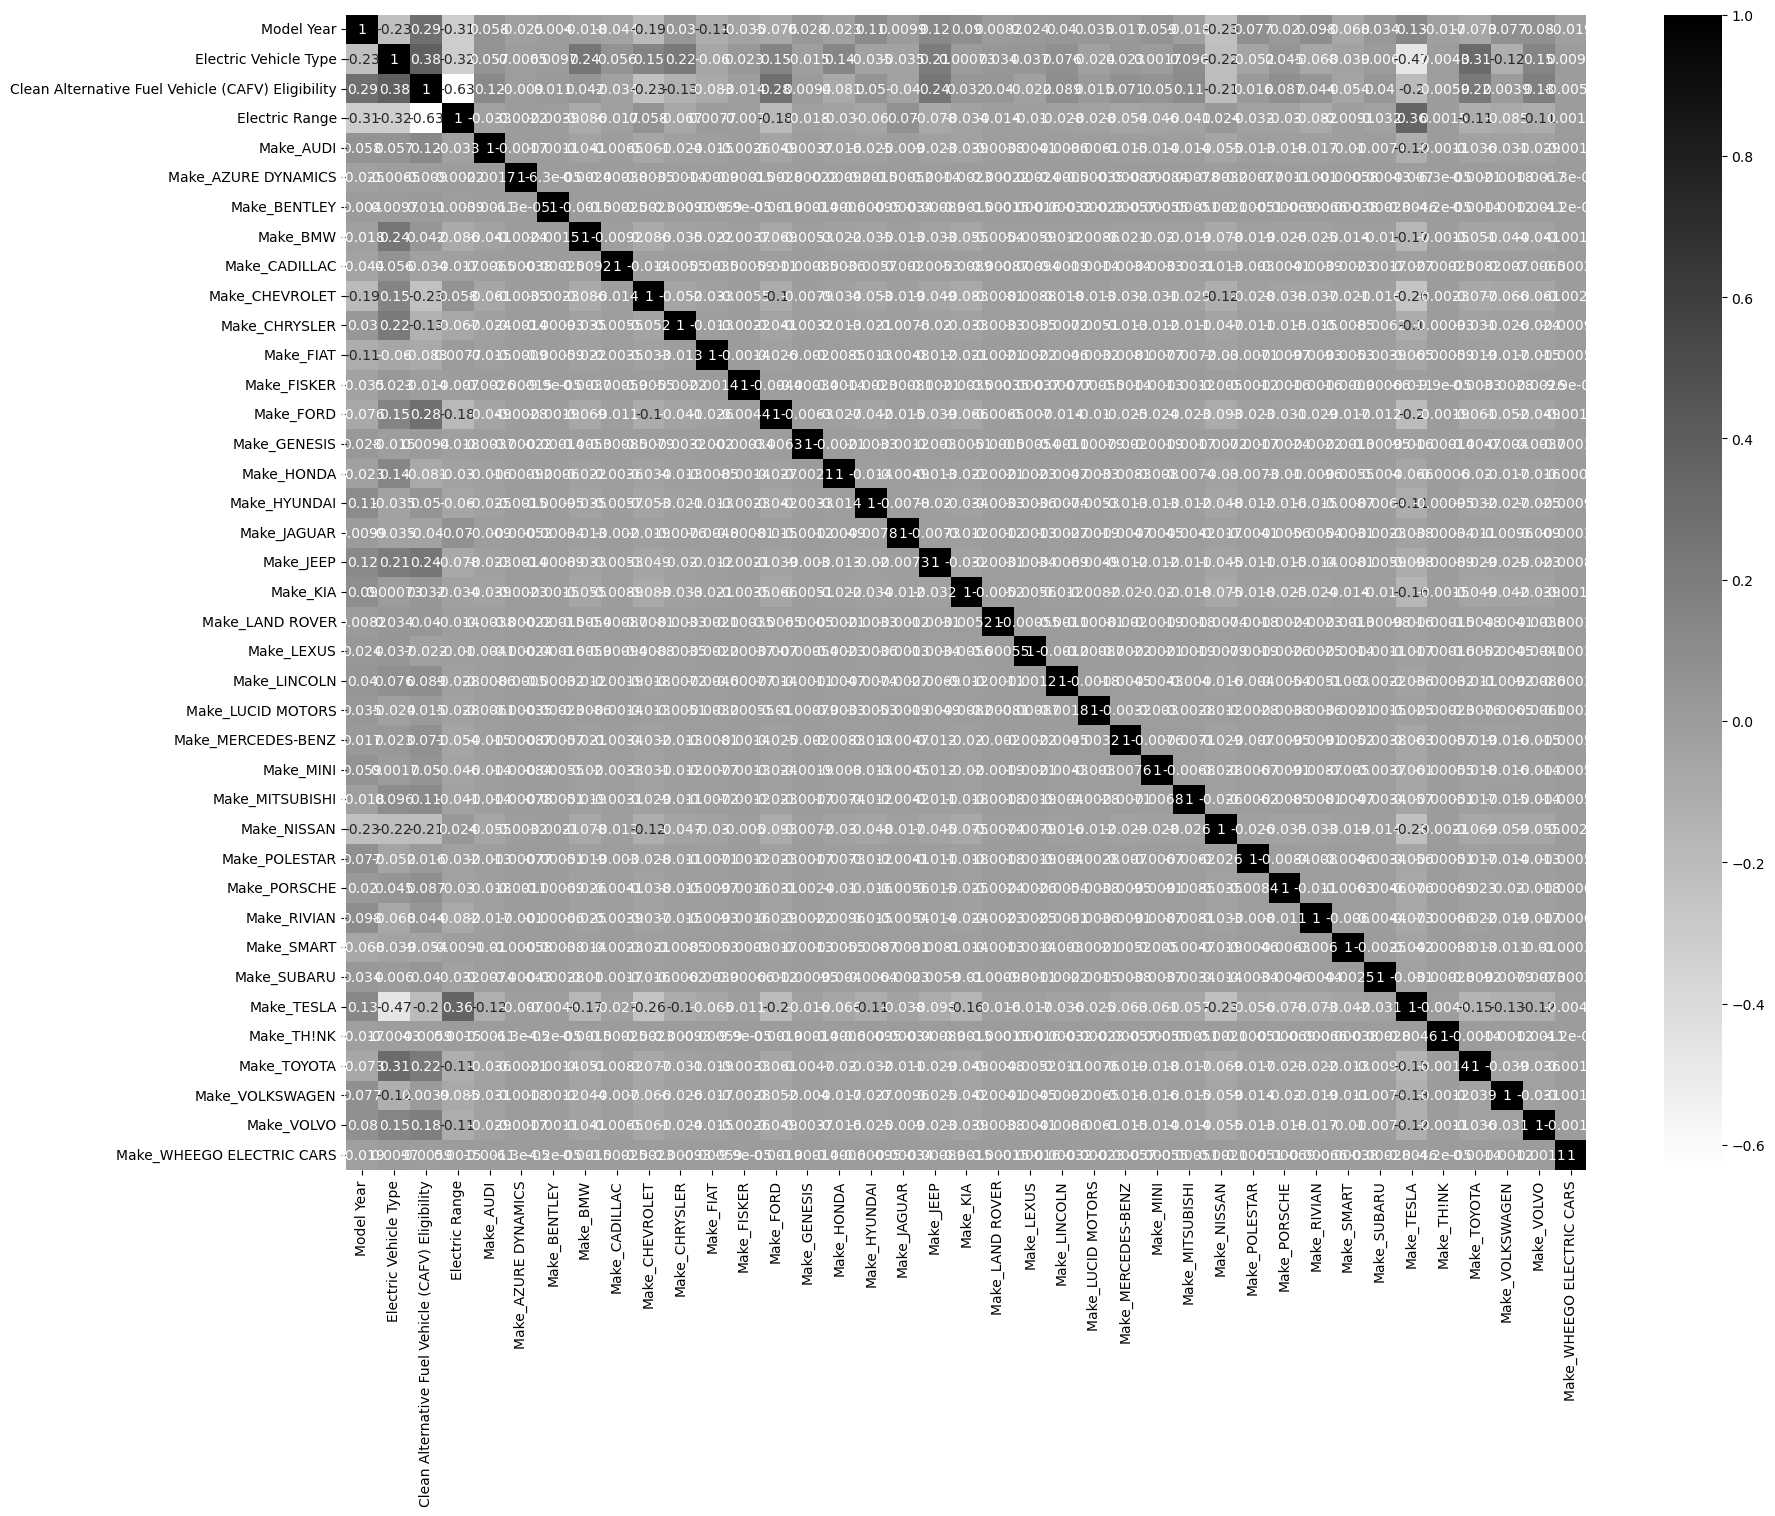

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="gray_r")

# Train Test Split

In [22]:
x=df.drop("Electric Vehicle Type",axis=1)
y=df["Electric Vehicle Type"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train.shape

(50600, 38)

In [25]:
x_test.shape

(21686, 38)

# Model Building - Electric Vehicle Type

# 1. Decision Tree

In [26]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [27]:
y_pred = dtc.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.9987088444157521

# 2. KNN

In [29]:
knn=KNeighborsClassifier()

In [30]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.999677211103938

# 3. SVM

In [32]:
svm=SVC(kernel="linear")

In [33]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
y_pred=svm.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9439269574840912

# 4. Random Forest

In [36]:
rfc=RandomForestClassifier(criterion='entropy')

In [37]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [38]:
y_pred_rfc=rfc.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred_rfc)

0.9998155492022504

# 5. Logistic Regression

In [40]:
lreg=LogisticRegression()

In [41]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=lreg.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred)

0.9407451812229088

# 6. Adaboost

In [44]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [45]:
y_pred = ada.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9997694365028129

# Accuracies of all Models for the feature Electric Vehicle Type are:
1.Decision Tree = 0.9987088444157521

2.KNN = 0.999677211103938

3.SVM = 0.9439269574840912

#### 4. Random Forest = 0.9998155492022504

5.Logistic Regression = 0.9407451812229088

6.Adaboost = 0.9997694365028129

# Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14992     4]
 [    1  6689]]


# As we can see the highest accuracy for Electric Vehicle Type classification model we got for is Random Forest which is 0.9998155492022504

In [48]:
df

,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS
0,2018,0,0,215,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2020,0,0,308,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2021,0,0,222,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,0,0,220,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,1,2,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121964,2023,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121969,2016,1,2,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121972,2020,1,2,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121975,2020,0,0,291,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Train Test Split for Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [49]:
x=df.drop("Clean Alternative Fuel Vehicle (CAFV) Eligibility",axis=1)
y=df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
x_train.shape

(50600, 38)

In [52]:
x_test.shape

(21686, 38)

# Model Building for Clean Alternative Fuel Vehicle (CAFV) Eligibility

# 1. Decision Tree

In [53]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [54]:
y_pred = dtc.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

1.0

### The accuracy of decision tree model is 1.0, it means that the model is able to perfectly predict the outcomes of your data. While this may sound impressive, it is important to be cautious and evaluate your model thoroughly.

In [56]:
scores = cross_val_score(dtc, x, y, cv=5)

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


### As after performing cross validation still the accuracy is coming 1.0 we can say that model is performing perfectly and it is not overfitting

# 2. KNN

In [58]:
knn=KNeighborsClassifier()

In [59]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)

0.9999538873005626

# 3. SVM

In [61]:
svm=SVC(kernel="linear")

In [62]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred=svm.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.9995849857050632

# 4. Random Forest

In [65]:
rfc=RandomForestClassifier(criterion='entropy')

In [66]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [67]:
y_pred_rfc=rfc.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred_rfc)

1.0

### The accuracy of Random Forest model is 1.0, it means that the model is able to perfectly predict the outcomes of your data. While this may sound impressive, it is important to be cautious and evaluate your model thoroughly.

In [69]:
scores = cross_val_score(rfc, x, y, cv=5)

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


### As after performing cross validation still the accuracy is coming 1.0 we can say that model is performing perfectly and it is not overfitting

# 5. Logistic Regression

In [71]:
lreg=LogisticRegression()

In [72]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred=lreg.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9994927603061883

# 6. Adaboost

In [75]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [76]:
y_pred = ada.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

1.0

### The accuracy of Adaboost model is 1.0, it means that the model is able to perfectly predict the outcomes of your data. While this may sound impressive, it is important to be cautious and evaluate your model thoroughly.

In [78]:
scores = cross_val_score(ada, x, y, cv=5)

In [79]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


### As after performing cross validation still the accuracy is coming 1.0 we can say that model is performing perfectly and it is not overfitting

# Accuracies of all Models for the feature Clean Alternative Fuel Vehicle (CAFV) Eligibility are:
#### 1.Decision Tree = 1.0

2.KNN = 0.9999538873005626

3.SVM = 0.9995849857050632

#### 4. Random Forest = 1.0

5.Logistic Regression = 0.9994927603061883

#### 6.Adaboost = 1.0

# The highest accuracies are for Decision Tree, Random Forest and Adaboost which is 1.0 and we also checked it with Cross Validation if the models are overfitted or not

# Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10640     0     0]
 [    0  7308     0]
 [    0     0  3738]]
